## 控制迷宫寻宝机器人

在这个项目中，你将使用刚刚学到的知识，尝试根据要求，编写代码，来控制一个机器人，在模拟环境中行走，并找到目标宝藏。

机器人所在的模拟环境中，会包含这样几个因素：机器人的起点、障碍物、宝藏箱。你的任务包括：

1. 分析模拟环境的数据
2. 控制机器人随机行动
3. （可选）控制机器人走到终点


* 一个良好的含有注释的代码，可以让你的程序可读性更高，尝试为你自己的代码添加相应的注释。

---

---

## 第一节 分析模拟环境的数据

首先，只有足够了解机器人所在的环境，我们的机器人才能成功找到目标宝藏，因此首先我们来对机器人所在环境的数据进行分析。在这个部分，会考察你对数据结构、控制流的了解。


### 1.1 理解模拟环境数据的储存格式

首先我们思考这样的问题：如何存储模拟环境的数据呢？

我们将我们的模拟环境抽象成一个格子世界，每个格子按照坐标编号进行标记；每个格子中会有四个情况，分别为普通格子（可通行）、机器人的起点（可通行）、障碍物（不可通行）、宝藏箱（目标点）。例如，一个模拟环境就可以抽象成3行4列的格子世界，并按这按这样的方法进行存储：
```
environment = [[0,0,0,2], 
               [1,2,0,0],
               [0,2,3,2]]
```
我们用了一个列表来保存虚拟世界的数据。外层列表中的每一个元素依然是一个列表，它代表模拟环境中每行的数据。而对于这个列表中的每个元素都是一个数，它们的含义是：
- 0: 普通格子（可通行）
- 1: 机器人的起点（可通行）
- 2: 障碍物（不可通行）
- 3: 宝藏箱（目标点）

那么，根据上述的数据，这个迷宫的第二行第一列，是我们机器人的起点。

__注：我们描述的迷宫的坐标位置（第一行第一列），和迷宫下标索引的值（如 `(0,0)`）是不一样的，请注意下标的问题。__


如下的代码，使用了辅助函数，读取了模拟环境的数据，并保存在了 `env_data` 变量中。


In [1]:
l = [1, 2, 3]
l

[1, 2, 3]

In [7]:
l2 = [[1, 2, 3], [1, 2, 3]]
l2

[[1, 2, 3], [1, 2, 3]]

In [4]:
import helper

env_data = helper.fetch_maze()

ModuleNotFoundError: No module named 'helper'

---


**任务1：**在如下代码中，请写代码获得这些值：

1. 模拟环境的长和宽
2. 模拟环境中第3行第6列元素

```
maze-id 1-1541258550
[[3, 2, 2, 2, 2, 2, 2, 2, 1],
 [0, 0, 2, 2, 2, 2, 2, 0, 0],
 [2, 0, 0, 2, 2, 2, 0, 0, 2],
 [2, 2, 0, 0, 2, 0, 0, 2, 2],
 [2, 2, 2, 0, 0, 0, 2, 2, 2]]
```

**解题思路：**    
1. 首先根据上面的打印出的env_data，判断env_data的数据类型为list，发现env_data中有元素`env_data[0]`, `env_data[1]`, ..., 他们的类型仍是list， 且长度相等。
2. env_data的长是env_data中有多少个list -> `len()`
3. env_data的宽是`env_data[i]`中有多少个元素，即`env_data[i]`的长度。
4. env_data第3行第6列元素：注意第三行的索引是2，第6列的索引是5。

In [ ]:
#TODO 1模拟环境的行数
rows = None 

#TODO 2模拟环境的列数
columns = None 

#TODO 3取出模拟环境第三行第六列的元素
row_3_col_6 = None 

print("迷宫共有", rows, "行", columns, "列，第三行第六列的元素是", row_3_col_6)

---

## 1.2 分析模拟环境数据

接着我们需要对模拟环境的中的数据进行分析。请根据如下的指示，计算相应的值。

---

**任务2：**在如下代码中，请计算模拟环境中，第一行和第三列的障碍物个数。

提示：*可以用循环完成。*

**解题思路：**    
1. 计算模拟环境中，第一行的的障碍物个数。-> 遍历env_data的第一行，如果元素的值的等于障碍物的值（2），则累加计数。
2. 计算模拟环境中，第三列的的障碍物个数。-> 遍历env_data的第三列，如果元素的值的等于障碍物的值（2），则累加计数。
3. env_data的第三列 -> 每一行的第三个元素

In [ ]:
#TODO 4计算模拟环境中，第一行的的障碍物个数。
number_of_barriers_row1 = None

#TODO 5计算模拟环境中，第三列的的障碍物个数。
number_of_barriers_col3 = None

print("迷宫中，第一行共有", number_of_barriers_row1, "个障碍物，第三列共有", number_of_barriers_col3, "个障碍物。")

In [ ]:
%run -i -e test.py RobotControllortTestCase.test_cal_barriers

---

**任务3：**在如下代码中：

1. 创建一个名为 `loc_map` 的字典，它有两个键值，分别为 `start` 和 `destination`，对应的值分别为起点和目标点的坐标，它们以如 `(0,0)` 的形式保存为元组。
2. 从字典中取出 `start` 对应的值，保存在 `robot_current_loc` 对应的变量中，这个变量表示小车现在的位置。

**解题思路：**    

1. start 和 destination 是元组（tuple），元组格式是 (x, y)，对应此题，x为行索引，y为列索引。
2. 取字典的值可以用`l_map['key']` 或者 `l_map.get('key')`

In [ ]:
loc_map = {} #TODO 6按照上述要求创建字典

robot_current_loc = None #TODO 7保存机器人当前的位置

In [ ]:
%run -i -e test.py RobotControllortTestCase.test_cal_loc_map


---

---

## 第二节 控制机器人随机漫步

在这一步中，你需发出指令，控制机器人在环境中随机行动。它会考察你对控制流、调用函数的知识。



## 2.1 控制机器人行动

我们的机器人能够执行四个动作：向上走 `u`、向下走 `d`、向左走 `l`、向右走 `r`。但是，由于有障碍，很多时候机器人的行动并不能成功。所以在这里，你需要实现一个函数，来判断机器人在某个位置，执行某个移动动作是否可行。

---

**任务4：**在下方代码中，实现名为 `is_move_valid_special` 的函数，它有两个输入，分别为机器人所在的位置坐标 `loc`，以及即将执行的动作 `act`，如 `(1,1)` 及 `u`。接着它的返回是一个布尔值，表明小车在 `loc` 位置下，是否可以执行动作 `act`。


提示1：*可以读取上方定义的 `env_data` 变量，来读取模拟环境的数据。*

提示2：*在实现函数后，请删去下方的 `pass` 代码。*

提示3：*我们需要处理边界的情况，即机器人走到了虚拟环境边界时，是不能够走出虚拟环境的。*

**解题思路：**    
1. 理解函数的传参：`is_move_valid_special(loc, act)`中，loc, act是`is_move_valid_special`的调用者传进来的，具有值。
2. 理解传入参数的意义：loc是一个tuple类型，代表当前机器人的位置左边，`loc[0]`是行坐标，`loc[1]`是列坐标；act是一个字符串类型，代表执行的动作（向上走 'u'、向下走 'd'、向左走 'l'、向右走 'r'）。
2. 执行逻辑参考：   
 -> 根据当前坐标loc和下一步要执行的动作，推测出执行动作后的坐标loc_next (x_n, y_n)   
 -> 判断loc_next在env_data中是否是障碍物，或者超出了env_data的边界（长和宽）   
 -> 返回判断结果

In [ ]:
def is_move_valid_special(loc, act):
    """
    Judge wether the robot can take action act
    at location loc.
    
    Keyword arguments:
    loc -- tuple, robots current location
    act -- string, robots meant action
    """
    #TODO 8
    pass

In [ ]:
%run -i -e test.py RobotControllortTestCase.test_is_move_valid_special

---
**任务5：**在下方代码中，重新实现一个名为 `is_move_valid` 的函数，它有三个输入，分别为模拟环境的数据 `env_data`、机器人所在的位置坐标 `loc`、以及即将执行的动作 `act`。它的返回值与此前一样，是一个布尔值，表明小车在给定的虚拟环境中的 `loc` 位置下，是否可以执行动作 `act`。

**解题思路（同上）：**    
1. 理解函数的传参：`is_move_valid_special(loc, act)`中，loc, act是`is_move_valid_special`的调用者传进来的，具有值。
2. 理解传入参数的意义：loc是一个tuple类型，代表当前机器人的位置左边，`loc[0]`是行坐标，`loc[1]`是列坐标；act是一个字符串类型，代表执行的动作（向上走 'u'、向下走 'd'、向左走 'l'、向右走 'r'）。
2. 执行逻辑参考：   
 -> 根据当前坐标loc和下一步要执行的动作，推测出执行动作后的坐标loc_next (x_n, y_n)   
 -> 判断loc_next在env_data中是否是障碍物，或者超出了env_data的边界（长和宽）   
 -> 返回判断结果

In [ ]:
def is_move_valid(env_data, loc, act):
    """
    Judge wethe​is_move_valid(env_data, loc, act)r the robot can take action act
    at location loc.
    
    Keyword arguments:
    env -- list, the environment data
    loc -- tuple, robots current location
    act -- string, robots meant action
    """
    #TODO 9
    pass

In [ ]:
%run -i -e test.py RobotControllortTestCase.test_is_move_valid

---

**任务6：**请回答：
  1. 在任务4及任务5中的实现的两个函数中，`env_data` 这个变量有什么不同？
  2. 调用``is_move_valid``函数，参数为``env_data_``、``loc_``、``act_``，如果在函数内修改``env_data``是否会改变``env_data_``的值？为什么？
  
提示：_可以尝试从变量作用域的角度回答该问题1。_


提示：_可以尝试从可变类型变量和不可变类型变量的角度回答该问题2。_



**回答：** （请在这里填写你的回答）

---

## 2.2 机器人可行动作

---

**任务7：**编写一个名为 `valid_actions` 的函数。它有两个输入，分别为虚拟环境的数据 `env_data`，以及机器人所在的位置 `loc`，输出是一个列表，表明机器人在这个位置所有的可行动作。

提示：*可以尝试调用上方定义的`is_move_valid`函数。*


**解题思路：**    
1. 定义函数的格式：   
```python 
def 函数名（参数列表）:
    ##函数体
       pass
```
2. 传入的参数：env_data, loc
3. 函数的返回：机器人在这个位置所有的可行动作， 可以使用列表的结构。
4. 执行逻辑   
->  定义一个返回动作的列表；   
->  遍历四个方向；   
->  判断如果该位置、该方向条件下的动作可以执行，则把该动作添加到返回列表里；   
->  遍历结束后返回列表。   

In [ ]:
## TODO 10 从头定义、实现你的函数

In [ ]:
%run -i -e test.py RobotControllortTestCase.test_valid_actions

---

## 2.3 移动机器人

当机器人收到一个动作的时候，你机器人的位置应发生相应的变化。

**任务8：**编写一个名为 `move_robot` 的函数，它有两个输入，分别为机器人当前所在的位置 `loc` 和即将执行的动作 `act`。接着会返回机器人执行动作之后的新位置 `new_loc`。

**解题思路：**    
1. 定义函数的格式：   
```python 
def 函数名（参数列表）:
    ##函数体
    pass
```
2. 传入的参数：loc, act
3. 函数的返回：机器人执行动作之后的新位置 new_loc。
4. 执行逻辑   
->  根据loc 和 act, 得到一个新位置new_loc；   
->  判断new_loc是否合法；   
->  如果不合法， 返回原位置loc，如果合法，返回新位置new_loc；   

In [ ]:
##TODO 11 从头定义、实现你的函数

In [ ]:
%run -i -e test.py RobotControllortTestCase.test_move_robot

---

## 2.4 随机移动机器人

接着，我们尝试在虚拟环境中随机移动机器人，看看会有什么效果。

**任务9：**编写一个名为 `random_choose_actions` 的函数，它有两个输入，分别为虚拟环境的数据 `env_data`，以及机器人所在的位置 `loc`。机器人会执行一个300次的循环，每次循环，他会执行以下任务：

1. 利用上方定义的 `valid_actions` 函数，找出当前位置下，机器人可行的动作；
2. 利用 `random` 库中的 `choice` 函数，从机器人可行的动作中，随机挑选出一个动作；
3. 接着根据这个动作，利用上方定义的 `move_robot` 函数，来移动机器人，并更新机器人的位置；
4. 当机器人走到终点时，输出“在第n个回合找到宝藏！”。

提示：如果机器人无法在300个回合内找到宝藏的话，试试看增大这个数字，也许会有不错的效果 :P

**解题思路：**    
1. 定义函数的格式：   
```python 
def 函数名（参数列表）:
    ##函数体
    pass
```
2. 传入的参数：env_data, loc
3. 函数的返回：无。
4. 执行逻辑   
->  判断当前位置loc是否是宝藏位置；   
->  如果是宝藏位置，则不再执行，跳出循环；   
->  如果不是，则更新机器人的位置坐标（找到可用的方向（动作）-> 随机选择一个方向 ->根据选择的方向更新位置） ，再次循环移动。  

In [ ]:
##TODO 12 从头实现你的函数

In [ ]:
# 运行
random_choose_actions(env_data, robot_current_loc)

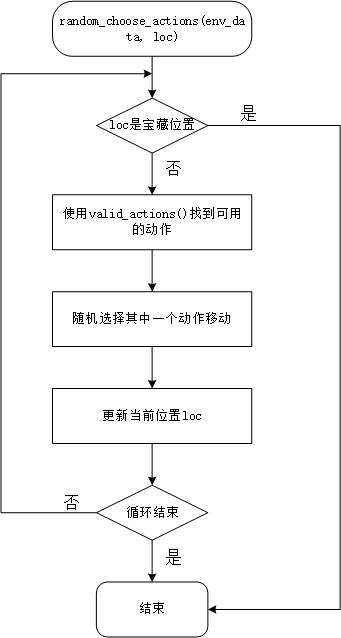


---

---

## （可选）第三节 控制机器人走到终点

## 3.1 控制机器人走到终点

在这里，你将综合上述的知识，编码控制机器人走到终点。这个任务对刚刚入门的你来说可能有些挑战，所以它是一个选做题。

**任务10**：尝试实现一个算法，能够对给定的模拟环境，输出机器人的行动策略，使之能够走到终点。

提示：_你可以尝试参考：_
* 深度/广度优先算法。
    以及以下参考资料：
    1. https://blog.csdn.net/raphealguo/article/details/7523411 
    2. https://www.cnblogs.com/yupeng/p/3414736.html 
* A星算法。
    以及以下参考资料：
    1. https://baike.baidu.com/item/A%2A算法 
    2. https://blog.csdn.net/hitwhylz/article/details/23089415

In [ ]:
##TODO 13 实现你的算法

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。